## **Chuẩn bị dữ liệu**:

##### Ở bước này sẽ thực hiện đọc dữ liệu đầu vào từ file train.csv:
##### - *Đối với tập train sẽ đọc từ train.csv và sử dụng cột 'fraud' trong dataframe để làm lớp của tập train (y)*
##### - *Đối với tập test sẽ đọc từ file test.csv*

In [67]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
df = pd.read_csv('./data/train.csv', sep='|')
df_test = pd.read_csv('./data/test.csv', sep='|')

new_df = df.dropna()
new_df_test = df_test.dropna()

new_df.insert(1, 'totalItemsScanned', new_df['scannedLineItemsPerSecond'] * new_df['totalScanTimeInSeconds'])
new_df_test.insert(1, 'totalItemsScanned', new_df_test['scannedLineItemsPerSecond'] * new_df_test['totalScanTimeInSeconds'])

y = new_df.pop('fraud')
X = new_df.drop(columns=[
    'scannedLineItemsPerSecond', 'lineItemVoidsPerPosition', 'valuePerSecond',
    'quantityModifications', 'grandTotal'
])
X_test = new_df_test.drop(columns=[
    'scannedLineItemsPerSecond', 'lineItemVoidsPerPosition', 'valuePerSecond',
    'quantityModifications', 'grandTotal'
])

print('Labels counts in X_train',len(X))
print('Total rows in test set',len(X_test))

Labels counts in X_train 1879
Total rows in test set 498121


## **Chia tập dữ liệu:**
##### Ở bước này sẽ chia tập dữ liệu đọc từ train.csv ra làm 2 phần cho train và validation

In [68]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=1)

## **Thực hiện áp dụng mô hình để học dữ liệu trên tập Train và đưa ra phân lớp trên tập Validation:**

##### Trước khi đi vào học và phân tích dữ liệu, nhóm sẽ tiến hành train dữ liệu với các mô hình học máy được cung cấp bởi sklearn và KHÔNG sử dụng siêu tham số để tiến hành đánh giá ban đầu, vì đây là bài toán phân lớp (Binary Classification) nên nhóm sẽ quyết định sử dụng 3 mô hình:

- *Decision Tree*

- *K-NN Neighbor*

- *Logistic Regression*

In [69]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression


# Dự đoán kết quả từng mô hình và lưu vào DataFrame
# Decision Tree
dt_model = DecisionTreeClassifier(max_depth=3, criterion='gini')
dt_model.fit(X_train, y_train)
dt_preds_train = dt_model.predict(X_train)
dt_preds_val = dt_model.predict(X_val)

# K-Nearest Neighbors
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
knn_preds_train = knn_model.predict(X_train)
knn_preds_val = knn_model.predict(X_val)

# Logistic Regression
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
lr_preds_train = lr_model.predict(X_train)
lr_preds_val = lr_model.predict(X_val)

c:\Users\dabei-laptop\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## **Đánh giá hiệu suất**

In [70]:
import sklearn.metrics as metrics

dt_train_cm = metrics.confusion_matrix(y_train, dt_preds_train)
dt_train_accuracy = metrics.accuracy_score(y_train,dt_preds_train)
print('The train confusion matrix for Decision Tree model is:', '\n', dt_train_cm)

dt_val_cm = metrics.confusion_matrix(y_val,dt_preds_val)
dt_val_accuracy = metrics.accuracy_score(y_val,dt_preds_val)
dt_val_precision = metrics.precision_score(y_val,dt_preds_val)
dt_val_recall = metrics.recall_score(y_val,dt_preds_val)
print('The validation confusion matrix for Decision Tree model is:', '\n', dt_val_cm)

print('Train accuracy: ',dt_train_accuracy,' | Validation accuracy: ',dt_val_accuracy)

The train confusion matrix for Decision Tree model is: 
 [[1416    6]
 [  29   52]]
The validation confusion matrix for Decision Tree model is: 
 [[351   2]
 [  6  17]]
Train accuracy:  0.9767132401862941  | Validation accuracy:  0.9787234042553191


In [71]:
knn_train_cm = metrics.confusion_matrix(y_train, knn_preds_train)
knn_train_accuracy = metrics.accuracy_score(y_train,knn_preds_train)
print('The train confusion matrix for K-NN model is:', '\n', knn_train_cm)

knn_val_cm = metrics.confusion_matrix(y_val,knn_preds_val)
knn_val_accuracy = metrics.accuracy_score(y_val,knn_preds_val)
knn_val_precision = metrics.precision_score(y_val,knn_preds_val)
knn_val_recall = metrics.recall_score(y_val,knn_preds_val)
print('The validation confusion matrix for K-NN model is:', '\n', knn_val_cm)

print('Train accuracy: ',knn_train_accuracy,' | Validation accuracy: ',knn_val_accuracy)

The train confusion matrix for K-NN model is: 
 [[1418    4]
 [  74    7]]
The validation confusion matrix for K-NN model is: 
 [[349   4]
 [ 23   0]]
Train accuracy:  0.9481037924151696  | Validation accuracy:  0.9281914893617021


In [72]:
lr_train_cm = metrics.confusion_matrix(y_train, lr_preds_train)
lr_train_accuracy = metrics.accuracy_score(y_train,lr_preds_train)
print('The train confusion matrix for Logistic Regression model is:', '\n', lr_train_cm)

lr_val_cm = metrics.confusion_matrix(y_val,lr_preds_val)
lr_val_accuracy = metrics.accuracy_score(y_val,lr_preds_val)
lr_val_precision = metrics.precision_score(y_val,lr_preds_val)
lr_val_recall = metrics.recall_score(y_val,lr_preds_val)
print('The validation confusion matrix for Logistic Regression model is:', '\n', lr_val_cm)

print('Train accuracy: ',lr_train_accuracy,' | Validation accuracy: ',lr_val_accuracy)

The train confusion matrix for Logistic Regression model is: 
 [[1417    5]
 [   5   76]]
The validation confusion matrix for Logistic Regression model is: 
 [[353   0]
 [  3  20]]
Train accuracy:  0.9933466400532269  | Validation accuracy:  0.9920212765957447


In [73]:
accuracies = [dt_val_accuracy,knn_val_accuracy,lr_val_accuracy]
best_accuracy = np.max(accuracies)
accuracy_name = accuracies.index(best_accuracy)
print(accuracy_name,' has the best accuracy: ',best_accuracy)

2  has the best accuracy:  0.9920212765957447


##### Thông qua confusion matrix, có thể thấy mô hình logistic đang cho ra TPR và FPR  cao hơn 2 mô hình còn lại

##### Thông qua độ đo 'Accuracy' logistic regression cũng đang có giá trị lớn nhất

#### => Logistic regression đang đưa ra sự phân lớp chính xác nhất trên tập validation

In [74]:
lr_pred_test = lr_model.predict(X_test)

# Create result DataFrame
result_df = pd.DataFrame({"fraud": lr_pred_test})

print('Rows with fraud predict: ',result_df[result_df['fraud'] == 1].shape)
print('Rows with non-fraud predict: ',result_df[result_df['fraud'] == 0].shape)

# Lưu kết quả ra file CSV
result_df.to_csv("./result/result.csv", index=False)

Rows with fraud predict:  (22551, 1)
Rows with non-fraud predict:  (475570, 1)


## **Tìm kiếm siêu tham số:**

##### *Trong mục này nhóm sử dụng GridSearchCV để cấu hình các tập giá trị siêu tham số và thực hiện lựa chọn tập giá trị cho ra kết quả phân lớp tốt nhất trên các mô hình*

##### *Mô hình Decision Tree:*

In [75]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, train_test_split

# Chia dữ liệu thành tập huấn luyện và tập validation
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=1)

# Định nghĩa các giá trị siêu tham số cần tìm kiếm
param_grid = {
    'max_depth': [None, 10, 20, 30],  # Độ sâu tối đa của cây
    'min_samples_split': [2, 5, 10],   # Số lượng mẫu tối thiểu cần để chia một nút
    'min_samples_leaf': [1, 2, 4]      # Số lượng mẫu tối thiểu ở các lá
}

# Khởi tạo mô hình cây quyết định
dt_model = DecisionTreeClassifier()

# Tạo GridSearchCV
grid_search = GridSearchCV(estimator=dt_model, param_grid=param_grid, cv=5, scoring='accuracy')

# Tiến hành tìm kiếm siêu tham số
grid_search.fit(X_train, y_train)

# In ra kết quả tốt nhất
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

# Đánh giá mô hình tốt nhất trên tập validation
best_dt_model = grid_search.best_estimator_
best_dt_val_preds = best_dt_model.predict(X_val)
best_dt_model_accuracy = metrics.accuracy_score(y_val, best_dt_val_preds)
best_dt_model_precision = metrics.precision_score(y_val, best_dt_val_preds)
best_dt_model_recall = metrics.recall_score(y_val,best_dt_val_preds)

print("Validation Accuracy:", best_dt_model_accuracy)
print("Validation Precision score:", best_dt_model_precision)

Best Parameters: {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 2}
Best Score: 0.9840420819490587
Validation Accuracy: 0.9867021276595744
Validation Precision score: 0.95


#### *Mô hình K-NN:*

In [76]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

# Khởi tạo mô hình
model = KNeighborsClassifier()

# Định nghĩa lưới các giá trị siêu tham số cần tìm kiếm
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11, 13, 15, 17],         # Số lượng hàng xóm gần nhất
    'weights': ['uniform', 'distance'],  # Phương pháp tính trọng số cho hàng xóm
    'metric': ['euclidean', 'manhattan'] # Phương pháp tính khoảng cách
}

# Khởi tạo GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')

# Thực hiện tìm kiếm siêu tham số
grid_search.fit(X_train, y_train)

# Lấy siêu tham số tốt nhất và điểm số tốt nhất
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

best_knn_model = grid_search.best_estimator_
best_knn_val_preds = best_knn_model.predict(X_val)
best_knn_model_accuracy = metrics.accuracy_score(y_val, best_knn_val_preds)
best_knn_model_precision = metrics.precision_score(y_val, best_knn_val_preds)
best_knn_model_recall = metrics.recall_score(y_val,best_knn_val_preds)

print("Validation Accuracy:", best_knn_model_accuracy)
print("Validation Precision score:", best_knn_model_precision)

Best Parameters: {'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'distance'}
Best Score: 0.9487707641196014
Validation Accuracy: 0.9361702127659575
Validation Precision score: 0.0


#### *Mô hình Logistic Regression:*

In [77]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Khởi tạo mô hình
model = LogisticRegression()

# Định nghĩa lưới các giá trị siêu tham số cần tìm kiếm
param_grid = {
    'penalty': ['l1', 'l2'],             # Phương pháp chuẩn hóa (L1 hoặc L2)
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000, 1000000]  # Tham số điều chuẩn
}

# Khởi tạo GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy',n_jobs=-1)

# Thực hiện tìm kiếm siêu tham số
grid_search.fit(X_train, y_train)

# Lấy siêu tham số tốt nhất và điểm số tốt nhất
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

best_lr_model = grid_search.best_estimator_
best_lr_val_preds = best_lr_model.predict(X_val)
best_lr_model_accuracy = metrics.accuracy_score(y_val, best_lr_val_preds)
best_lr_model_precision = metrics.precision_score(y_val, best_lr_val_preds)
best_lr_model_recall = metrics.recall_score(y_val,best_lr_val_preds)

print("Validation Accuracy:", best_lr_model_accuracy)
print("Validation Precision score:", best_lr_model_precision)

Best Parameters: {'C': 10, 'penalty': 'l2'}
Best Score: 0.9920221483942415
Validation Accuracy: 0.9920212765957447
Validation Precision score: 0.9545454545454546


c:\Users\dabei-laptop\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
50 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
50 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\dabei-laptop\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\dabei-laptop\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File 

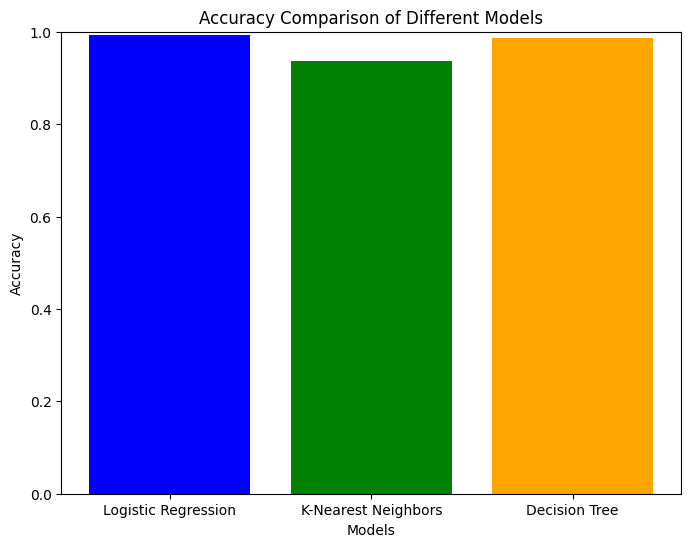

In [78]:
# Tạo danh sách các mô hình và độ đo accuracy tương ứng
models = ['Logistic Regression', 'K-Nearest Neighbors', 'Decision Tree']
accuracies = [best_lr_model_accuracy, best_knn_model_accuracy, best_dt_model_accuracy]

# Vẽ biểu đồ cột so sánh độ đo accuracy
plt.figure(figsize=(8, 6))
plt.bar(models, accuracies, color=['blue', 'green', 'orange'])
plt.title('Accuracy Comparison of Different Models')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.show()

##### ***=> Logistic Regression lại đưa ra giá trị đo 'Accuracy' cao nhất với siêu tham số:***

In [79]:
best_params

{'C': 10, 'penalty': 'l2'}

## **So sánh giữa 2 mô hình normal và hyper-parameter applied:**

In [80]:
#Dùng mô hình Logistic với siêu tham số để train với tập test
lr_best_pred_test = best_lr_model.predict(X_test)

##Lưu vào dataframe
result_best_df = pd.DataFrame({"fraud": lr_best_pred_test})

##Sự khác biệt giữa mô hình logistic đã áp dụng siêu tham số so với KHÔNG áp dụng
print('Rows end up detecting fraud with normal model: ',len(result_df[result_df['fraud'] == 1]))
print('Rows end up detecting fraud with hyper-parameter applied model: ',len(result_best_df[result_best_df['fraud'] == 1]))

Rows end up detecting fraud with normal model:  22551
Rows end up detecting fraud with hyper-parameter applied model:  23286


##### => *Có thể thấy sau khi train với dữ liệu của tập Test, mô hình logistic sử dụng siêu tham số đã đưa ra được kết quả nhiều hơn ở lớp 'fraud' (Điều này không liên quan tới tính chính xác của mô hình trên tập dữ liệu mới nhưng nó cho thấy sự khác biệt giữa 2 mô hình)*

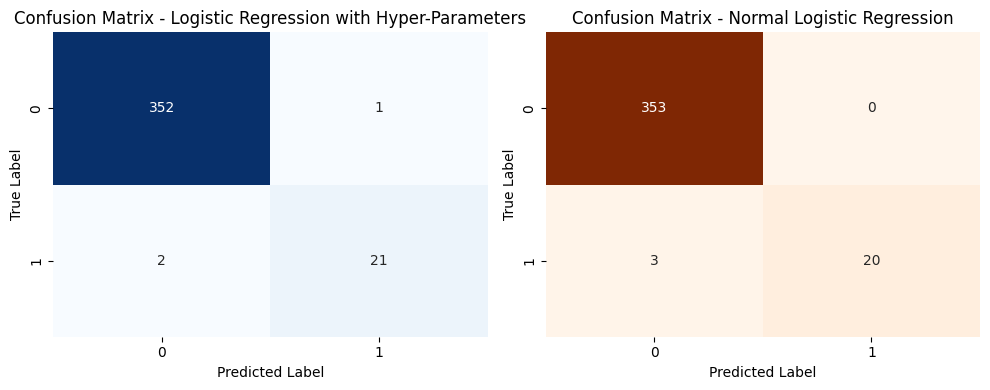

In [81]:
import seaborn as sns
import matplotlib.pyplot as plt

cm_lr_hp = confusion_matrix(y_val,best_lr_val_preds)
cm_lr = confusion_matrix(y_val,lr_preds_val)
# Vẽ confusion matrix cho mô hình 1
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
sns.heatmap(cm_lr_hp, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("Confusion Matrix - Logistic Regression with Hyper-Parameters")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")

# Vẽ confusion matrix cho mô hình 2
plt.subplot(1, 2, 2)
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Oranges', cbar=False)
plt.title("Confusion Matrix - Normal Logistic Regression")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")

plt.tight_layout()
plt.show()

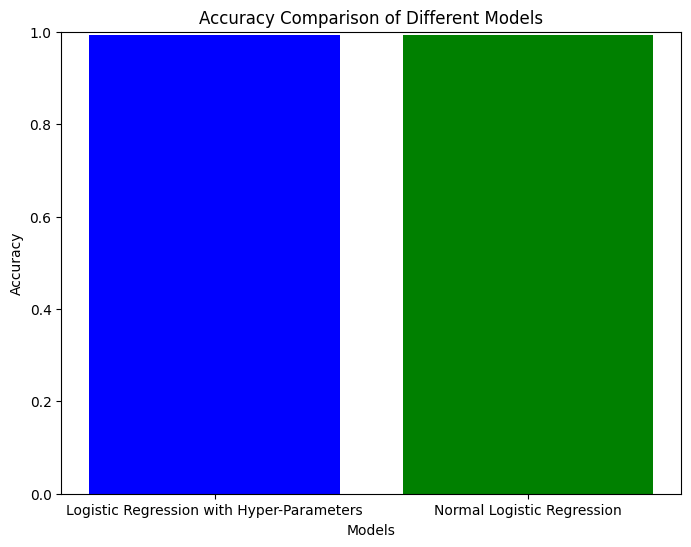

In [82]:
# Tạo danh sách các mô hình và độ đo accuracy tương ứng
models = ['Logistic Regression with Hyper-Parameters', 'Normal Logistic Regression']
accuracies = [best_lr_model_accuracy,lr_val_accuracy]

# Vẽ biểu đồ cột so sánh độ đo accuracy
plt.figure(figsize=(8, 6))
plt.bar(models, accuracies, color=['blue', 'green', 'orange'])
plt.title('Accuracy Comparison of Different Models')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.show()

In [83]:
print('Logistic model with Hyper-parameters Accuracy score: ', best_lr_model_accuracy);
print('Normal Logistic model Accuracy score: ', lr_val_accuracy);

Logistic model with Hyper-parameters Accuracy score:  0.9920212765957447
Normal Logistic model Accuracy score:  0.9920212765957447


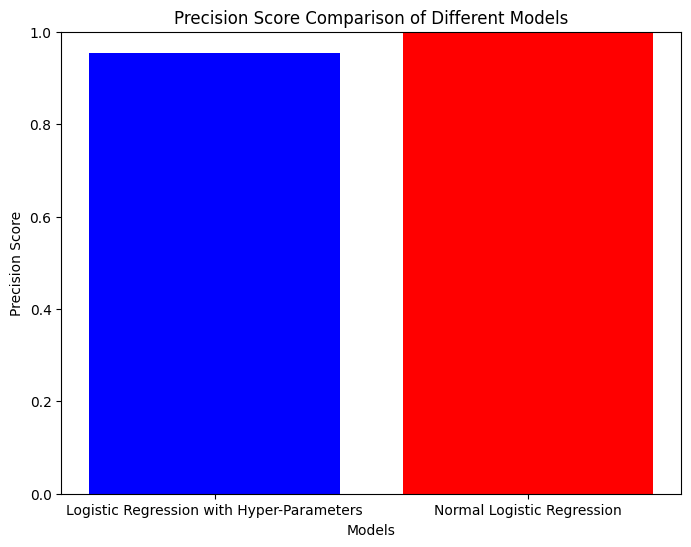

In [84]:
# Tạo danh sách các mô hình và precision score tương ứng
models = ['Logistic Regression with Hyper-Parameters', 'Normal Logistic Regression']
precisions = [best_lr_model_precision, lr_val_precision]

# Vẽ biểu đồ cột so sánh precision score
plt.figure(figsize=(8, 6))
plt.bar(models, precisions, color=['blue', 'red'])
plt.title('Precision Score Comparison of Different Models')
plt.xlabel('Models')
plt.ylabel('Precision Score')
plt.ylim(0, 1)
plt.show()

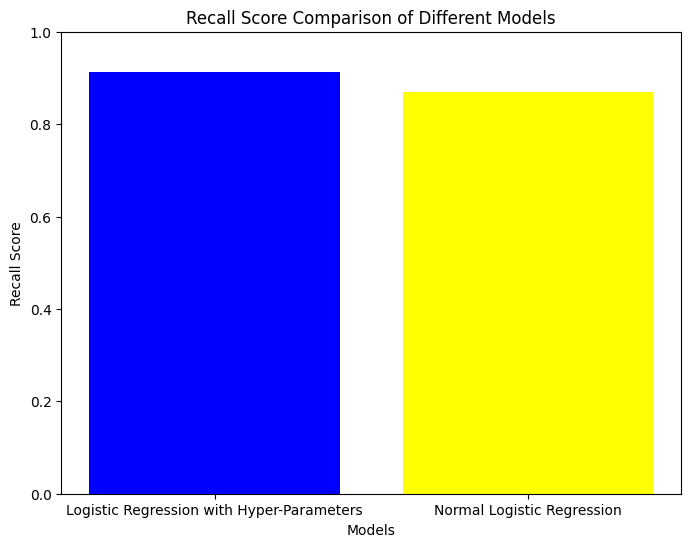

In [85]:
# Tạo danh sách các mô hình và recall score tương ứng
models = ['Logistic Regression with Hyper-Parameters', 'Normal Logistic Regression']
precisions = [best_lr_model_recall, lr_val_recall]

# Vẽ biểu đồ cột so sánh precision score
plt.figure(figsize=(8, 6))
plt.bar(models, precisions, color=['blue', 'yellow'])
plt.title('Recall Score Comparison of Different Models')
plt.xlabel('Models')
plt.ylabel('Recall Score')
plt.ylim(0, 1)
plt.show()

##### => **Dựa vào so sánh giữa độ đo Accuracy của 2 mô hình cũng như confusion matrix, mô hình logistic với siêu tham số cho ra kết quả chính xác hơn mặc dù không có quá nhiều sự khác biệt**

## **Tiến hành xuất ra phân lớp của tập Test dựa trên mô hình đưa ra độ đo tốt nhất đã học**

In [86]:
from datetime import datetime

print('Rows with fraud predict: ',result_best_df[result_best_df['fraud'] == 1].shape)
print('Rows with non-fraud predict: ',result_best_df[result_best_df['fraud'] == 0].shape)

# Lấy thời gian hiện tại và định dạng nó để sử dụng trong tên file
current_time = datetime.now().strftime("%Y%m%d_%H%M%S")

# Tạo tên file với thời gian hiện tại
file_name = f"./result/Group_08_Competition_Phase2_Results_{current_time}.txt"

# Lưu DataFrame vào file CSV với tên file đã tạo
result_df.to_csv(file_name, index=False)

Rows with fraud predict:  (23286, 1)
Rows with non-fraud predict:  (474835, 1)


*Báo cáo này được thực hiện bởi nhóm 8, có tham khảo từ các nội dung trên internet và đảm bảo 100% các nội dung được viết trong đây hoàn toàn là từ những đúc kết sau quá trình tìm hiểu và hiện thực hoá đề tài của các thành viên trong nhóm. Xin cảm ơn Thầy đã đưa ra đề tài và hướng dẫn chúng em*